# Flowster-Forums Data Cleaning and Visualization
#### Khushali Verma

## 1. Basic Feature Extraction

Import pandas. Read the .csv created using Web Scraping Flowster Forums.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('Flowster_Topic_Attributes.csv')

In [3]:
train

,id,Topic Title,Category,Tags,Author,Commenters,Leading Comment,Other Comments,Likes,Views
0,0,About the Product Sourcing Category,Product Sourcing,[],Trent-Admin,[],Have questions about sourcing products? This i...,[],0,0
1,1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,[],Mitch,['MoniqueAndKerry'],Hi! We are new to the forum and are going thro...,['Yes you will need the paid version. Options...,0,25
2,2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],As I am working in Amazon as a seller from las...,[],0,0
3,3,Virtual Assistants,Product Sourcing,[],JimW_PB,"['McDavid', 'Mitch', 'Rebca']","Does anyone have a VA they recommend, have use...",['@McDavid Most don’t want to share any stella...,0,149
4,4,Can you sell branded products on Amazon uk,Product Sourcing,['Sourcing Brand Name Products'],Mitch,['Rameksuya'],Can you sell branded products on Amazon Uk or ...,['You can sell on Amazon UK as well. It could...,0,74
...,...,...,...,...,...,...,...,...,...,...
256,256,Tracking COGS,Financial Management,['Accounting & Bookkeeping'],WT_Organics,"['APlusSeller', 'LizD', 'Mitch', 'terrifetters']","Hello,\nDoes anyone have any advise on how to ...",['We use Seller Legend to track COGS for Amazo...,4,329
257,257,Accounting Software,Financial Management,['Accounting & Bookkeeping'],jims,"['Mitch', 'Trent-Admin', 'BetterLifeSales']",What accounting software does everyone use?\nI...,['@jims We use Xero 5. They are pretty solid....,3,222
258,258,About the Sales Channels & Marketplaces Category,eCommerce Marketplaces,[],Trent-Admin,[],Have questions about sourcing the various sale...,[],0,0
259,259,Storefront Question,eCommerce Marketplaces,[],scottschmitz,['Laura'],"If I am posting this in the wrong place, my ap...",['@scottschmitz we would be able to do transac...,0,194


### 1.1 Number of Words

Here, we extract the number of words in each Leading Comment and total number of words associated with all Other Comments.

In [4]:
train['word_count_leading'] = train['Leading Comment'].apply(lambda x: len(str(x).split(" ")))
train['word_count_other'] = train['Other Comments'].apply(lambda x: len(str(x).split(" ")))
train[['Leading Comment','word_count_leading', 'Other Comments', 'word_count_other']].head()

,Leading Comment,word_count_leading,Other Comments,word_count_other
0,Have questions about sourcing products? This i...,23,[],1
1,Hi! We are new to the forum and are going thro...,63,['Yes you will need the paid version. Options...,28
2,As I am working in Amazon as a seller from las...,81,[],1
3,"Does anyone have a VA they recommend, have use...",16,['@McDavid Most don’t want to share any stella...,117
4,Can you sell branded products on Amazon Uk or ...,15,['You can sell on Amazon UK as well. It could...,34


### 1.2 Number of Characters

Number of characters in each Leading Comment and total number of characters in all corresponding Other Comments are calculated.

In [5]:
train['char_count_leading'] = train['Leading Comment'].str.len() #with spaces
train['char_count_leading'] = train['char_count_leading'].apply(lambda x: x-2)
train['char_count_other'] = train['Other Comments'].str.len() #with spaces
train['char_count_other'] = train['char_count_other'].apply(lambda x: x-2)
train[['Leading Comment','char_count_leading', 'Other Comments', 'char_count_other']].head()

,Leading Comment,char_count_leading,Other Comments,char_count_other
0,Have questions about sourcing products? This i...,145.0,[],0
1,Hi! We are new to the forum and are going thro...,367.0,['Yes you will need the paid version. Options...,159
2,As I am working in Amazon as a seller from las...,578.0,[],0
3,"Does anyone have a VA they recommend, have use...",88.0,['@McDavid Most don’t want to share any stella...,661
4,Can you sell branded products on Amazon Uk or ...,69.0,['You can sell on Amazon UK as well. It could...,163


### 1.3 Average Word Length in each comment

The question we are here is - How many words on average are written in a single comment?

In [7]:
def avg_word(sentence):
    if type(sentence)==str:
        words = sentence.split()
        return (sum(len(word) for word in words)/len(words))
    
    return 0

train['avg_word'] = train['Leading Comment'].apply(lambda x: avg_word(x))
train[['Leading Comment','avg_word']].head()

,Leading Comment,avg_word
0,Have questions about sourcing products? This i...,5.434783
1,Hi! We are new to the forum and are going thro...,4.781250
2,As I am working in Amazon as a seller from las...,5.076087
3,"Does anyone have a VA they recommend, have use...",4.687500
4,Can you sell branded products on Amazon Uk or ...,3.800000


### 1.4 Number of Stopwords

Calculating the number of stopwords using the Natural Language ToolKit

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\KHUSHALI
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
train['Leading Comment'] = train['Leading Comment'].apply(lambda x: x if type(x)==str else "")
train['stopwords'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split(' ') if x in stop]))
train[['Leading Comment','stopwords']].head()

,Leading Comment,stopwords
0,Have questions about sourcing products? This i...,10
1,Hi! We are new to the forum and are going thro...,28
2,As I am working in Amazon as a seller from las...,23
3,"Does anyone have a VA they recommend, have use...",7
4,Can you sell branded products on Amazon Uk or ...,6


### 1.5 Number of special characters

Calculating the number of hashtags at the beginning of a word

In [11]:
train['hashtags_leading'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train['hashtags_other'] = train['Other Comments'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['Leading Comment','hashtags_leading', 'Other Comments', 'hashtags_other']].head()

,Leading Comment,hashtags_leading,Other Comments,hashtags_other
0,Have questions about sourcing products? This i...,0,[],0
1,Hi! We are new to the forum and are going thro...,0,['Yes you will need the paid version. Options...,0
2,As I am working in Amazon as a seller from las...,0,[],0
3,"Does anyone have a VA they recommend, have use...",0,['@McDavid Most don’t want to share any stella...,0
4,Can you sell branded products on Amazon Uk or ...,0,['You can sell on Amazon UK as well. It could...,0


Calculating the number of '@' at the beginning of a word.

In [12]:
train['attherates_Leading'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train['attherates_Other'] = train['Other Comments'].apply(lambda x: len([x for x in x[2:].split() if x.startswith('@')]))
train[['Leading Comment','attherates_Leading', 'Other Comments', 'attherates_Other']].head()

,Leading Comment,attherates_Leading,Other Comments,attherates_Other
0,Have questions about sourcing products? This i...,0,[],0
1,Hi! We are new to the forum and are going thro...,0,['Yes you will need the paid version. Options...,0
2,As I am working in Amazon as a seller from las...,0,[],0
3,"Does anyone have a VA they recommend, have use...",0,['@McDavid Most don’t want to share any stella...,1
4,Can you sell branded products on Amazon Uk or ...,0,['You can sell on Amazon UK as well. It could...,0


### 1.6 Number of numerics

Counting the number of occurences of a digit.

In [13]:
train['numerics_Leading'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train['numerics_Other'] = train['Other Comments'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['Leading Comment','numerics_Leading', 'Other Comments', 'numerics_Other']].head()

,Leading Comment,numerics_Leading,Other Comments,numerics_Other
0,Have questions about sourcing products? This i...,0,[],0
1,Hi! We are new to the forum and are going thro...,0,['Yes you will need the paid version. Options...,0
2,As I am working in Amazon as a seller from las...,2,[],0
3,"Does anyone have a VA they recommend, have use...",0,['@McDavid Most don’t want to share any stella...,1
4,Can you sell branded products on Amazon Uk or ...,0,['You can sell on Amazon UK as well. It could...,0


### 1.7 Number of Uppercase Words

How many words are in Uppercase?

In [14]:
train['upper_Leading'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train['upper_Other'] = train['Other Comments'].apply(lambda x: len([x for x in x[2:].split() if x.isupper()]))
train[['Leading Comment','upper_Leading', 'Other Comments', 'upper_Other']].head()

,Leading Comment,upper_Leading,Other Comments,upper_Other
0,Have questions about sourcing products? This i...,0,[],0
1,Hi! We are new to the forum and are going thro...,2,['Yes you will need the paid version. Options...,1
2,As I am working in Amazon as a seller from las...,2,[],0
3,"Does anyone have a VA they recommend, have use...",1,['@McDavid Most don’t want to share any stella...,3
4,Can you sell branded products on Amazon Uk or ...,0,['You can sell on Amazon UK as well. It could...,2


### 1.8 Categorical Frequencies

Count how many comments occur in each of the categories.

In [36]:
train['Category'].value_counts()

Flowster-specific             59
Amazon Specific               53
Product Sourcing              53
Human Resources               21
Fulfillment                   17
Management                    15
Software & Tools              14
Misc Topics                   11
Traffic Sources                8
Financial Management           7
eCommerce Marketplaces         2
Store & Website Management     1
Name: Category, dtype: int64

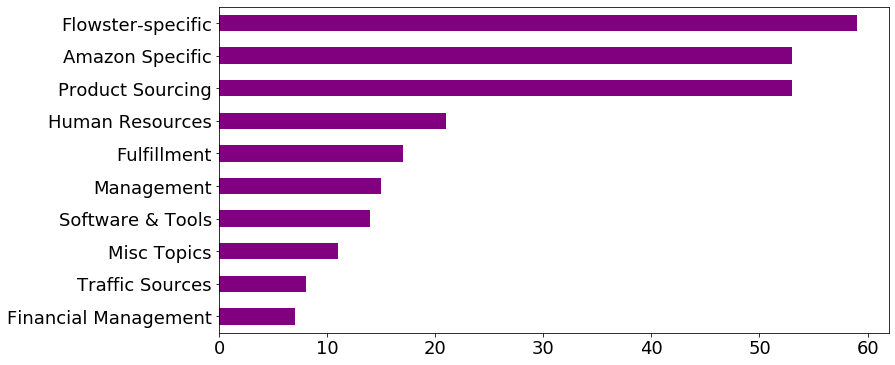

In [44]:
train['Category'].value_counts()[:10].plot(kind='barh', figsize=[12,6], fontsize=18, color='purple').invert_yaxis()

###### Inference
Three categories - Flowster Specific, Amazon Specific and Product Sourcing are the most active categories with maximum number of comments.

### 1.9 Tags Frequencies

Count the frequencies of each tag corresponding to the comments.

In [37]:
train['Tags'].value_counts()

[]                                     116
['Free SOPs']                           18
['All Other Amazon Related Issues']     13
['Shipping']                            12
['Sourcing Brand Name Products']        12
['Inventory Management']                11
['Updates']                             11
['Managing a Virtual Team']              9
['PPC']                                  8
['Leadership']                           5
['Marketplace']                          5
['Accounting & Bookkeeping']             4
['Reviews & Customer Service']           3
['Shopify']                              3
['Vendor Management']                    3
['Recruiting']                           3
['Vendor Relations']                     3
['Email Marketing']                      3
['Project Management']                   2
['Pricing & Negotiation']                2
['Performance Reviews']                  1
['Articles, Books, and Resources']       1
['Education & Training']                 1
['Member In

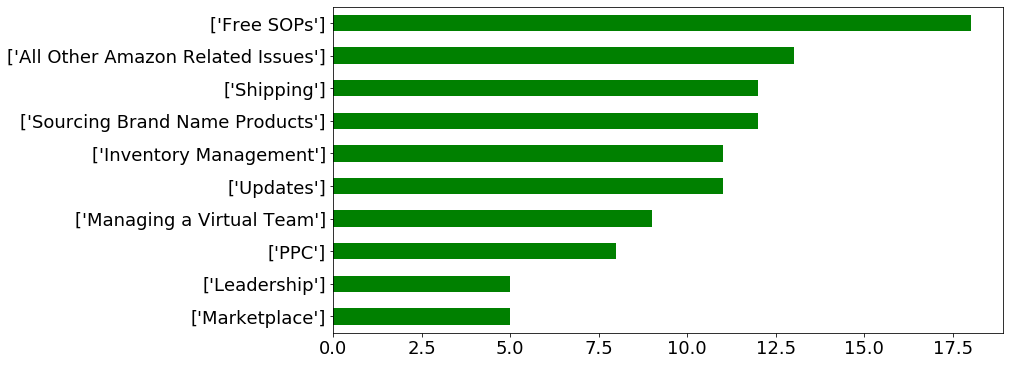

In [47]:
train['Tags'].value_counts()[1:11].plot(kind='barh', figsize=[12,6], fontsize=18, color='green').invert_yaxis()

###### Inference
The tag 'Free SOPs' is associated with more comments than any other tag. Some other widely used tags include 'All Other Amazon Related Issues', 'Shipping' and 'Sourcing Brand Name Products'.

### 1.10 Which author commented the maximum number of times?

In [39]:
train['Author'].value_counts()

Mitch               39
LizD                24
Kane                24
Laura               23
Trent-Admin         17
                    ..
VonT                 1
tinamoran            1
Kevin                1
Dennis_Scheurich     1
Kstots               1
Name: Author, Length: 70, dtype: int64

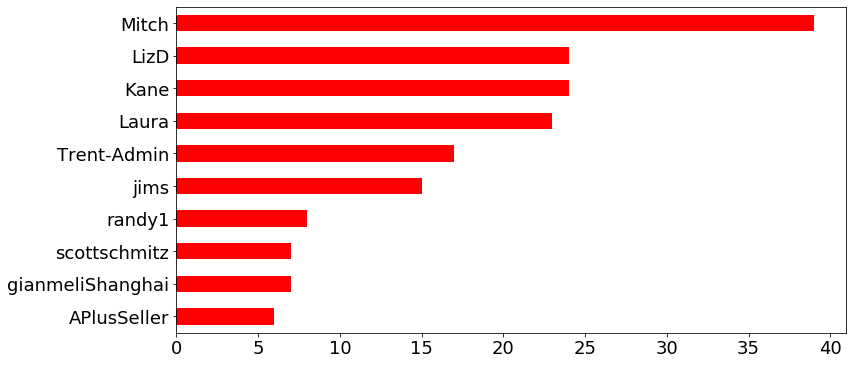

In [48]:
train['Author'].value_counts()[:10].plot(kind='barh', figsize=[12,6], fontsize=18, color='red').invert_yaxis()

###### Inference
Mitch is the most active user with the maximum number of comments in various categories.

### 1.11 How many unique values does each Feature have?

In [35]:
print('Rows : Columns :: ', train.shape[0], ':', train.shape[1])
print('Unique values:')
print(train.nunique()[:10])

Rows : Columns ::  261 : 24
Unique values:
id                 261
Topic Title        261
Category            12
Tags                35
Author              70
Commenters         116
Leading Comment    261
Other Comments     216
Likes               12
Views              148
dtype: int64


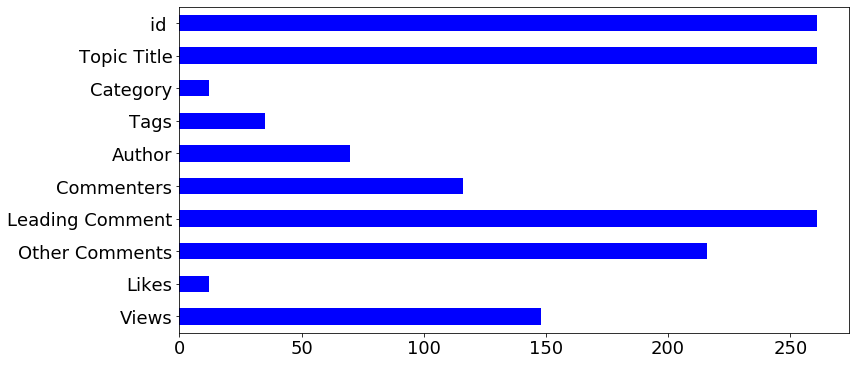

In [50]:
train.nunique()[:10].plot(kind='barh', figsize=[12,6], fontsize=18, color='blue').invert_yaxis()

## 2. Basic Pre-Processing

### 2.1 Converting to Lower Case

In [51]:
train['Leading Comment'] = train['Leading Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['Other Comments'] = train['Other Comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train[['Leading Comment', 'Other Comments']].head()

,Leading Comment,Other Comments
0,have questions about sourcing products? this i...,[]
1,hi! we are new to the forum and are going thro...,['yes you will need the paid version. options ...
2,as i am working in amazon as a seller from las...,[]
3,"does anyone have a va they recommend, have use...",['@mcdavid most don’t want to share any stella...
4,can you sell branded products on amazon uk or ...,['you can sell on amazon uk as well. it could ...


### 2.2 Removing Punctuation

In [52]:
train['Leading Comment'] = train['Leading Comment'].str.replace('[^\w\s]','')
train['Other Comments'] = train['Other Comments'].str.replace('[^\w\s]','')
train[['Leading Comment', 'Other Comments']].head()

,Leading Comment,Other Comments
0,have questions about sourcing products this is...,
1,hi we are new to the forum and are going throu...,yes you will need the paid version options for...
2,as i am working in amazon as a seller from las...,
3,does anyone have a va they recommend have used...,mcdavid most dont want to share any stellar va...
4,can you sell branded products on amazon uk or ...,you can sell on amazon uk as well it could act...


### 2.3 Removing Stopwords

In [53]:
train['Leading Comment'] = train['Leading Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['Other Comments'] = train['Other Comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train[['Leading Comment', 'Other Comments']].head()

,Leading Comment,Other Comments
0,questions sourcing products category use pleas...,
1,hi new forum going product sourcing profession...,yes need paid version options extraction tools...
2,working amazon seller last 6 years want tips s...,
3,anyone va recommend used currently using requi...,mcdavid dont want share stellar va currently u...
4,sell branded products amazon uk must amazon com,sell amazon uk well could actually big selling...


### 2.4 Common Word Removal

In [54]:
freq_Leading = pd.Series(' '.join(train['Leading Comment']).split()).value_counts()[:10]
freq_Other = pd.Series(' '.join(train['Other Comments']).split()).value_counts()[:10]

In [55]:
freq_Leading

amazon      113
use          75
get          74
im           73
brand        72
product      69
email        61
like         59
want         59
products     58
dtype: int64

In [56]:
freq_Other

amazon     167
product    133
would      132
brand      129
use        114
get        111
want        90
also        87
need        84
one         83
dtype: int64

In [57]:
train_data = train.copy()

In [58]:
freq_Leading = list(freq_Leading.index)
freq_Other = list(freq_Other.index)
train['Leading Comment'] = train['Leading Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_Leading))
train['Other Comments'] = train['Other Comments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_Other))
train[['Leading Comment', 'Other Comments']].head()

,Leading Comment,Other Comments
0,questions sourcing category please sure select...,
1,hi new forum going sourcing professionals sops...,yes paid version options extraction tools incl...
2,working seller last 6 years tips selling growi...,
3,anyone va recommend used currently using requi...,mcdavid dont share stellar va currently using ...
4,sell branded uk must com,sell uk well could actually big selling point ...


### 2.5 Rare Word Removal

In [59]:
freq_Leading = pd.Series(' '.join(train['Leading Comment']).split()).value_counts()[-10:]
freq_Other = pd.Series(' '.join(train['Other Comments']).split()).value_counts()[-10:]

In [60]:
freq_Leading

everybodys                     1
itll                           1
httpsinflowsterapptemplates    1
usual                          1
philippines                    1
efforts                        1
httpbrightideasco274           1
portal                         1
outta                          1
theyll                         1
dtype: int64

In [61]:
freq_Other

credentialsnonce    1
ahrefs              1
nov                 1
egn                 1
mitchnnthat         1
wake                1
manufactured        1
manually            1
rambling            1
targets             1
dtype: int64

In [62]:
freq_Leading = list(freq_Leading.index)
freq_Other = list(freq_Other.index)
train['Leading Comment'] = train['Leading Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_Leading))
train['Other Comments'] = train['Other Comments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_Other))
train[['Leading Comment', 'Other Comments']].head()

,Leading Comment,Other Comments
0,questions sourcing category please sure select...,
1,hi new forum going sourcing professionals sops...,yes paid version options extraction tools incl...
2,working seller last 6 years tips selling growi...,
3,anyone va recommend used currently using requi...,mcdavid dont share stellar va currently using ...
4,sell branded uk must com,sell uk well could actually big selling point ...


### 2.6 Spelling Correction

In [73]:
from textblob import TextBlob

In [70]:
train['Leading Comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    questions pouring category please sure select ...
1    hi new forum going pouring professional sons q...
2    working seller last 6 years tips selling growi...
3    anyone va recommend used currently using requi...
4                             sell branded up must com
Name: Leading Comment, dtype: object

In [72]:
train['Other Comments'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                                     
1    yes paid version option extraction tools inclu...
2                                                     
3    david dont share cellar va currently using bes...
4    sell up well could actually big selling point ...
Name: Other Comments, dtype: object

### 2.7 Tokenization

In [74]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\KHUSHALI
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
TextBlob(train['Leading Comment'][1]).words

WordList(['hi', 'new', 'forum', 'going', 'sourcing', 'professionals', 'sops', 'question', 'extraction', 'workflow', 'process', 'using', 'pc2', 'downloaded', 'free', 'version', 'doesnt', 'button', 'says', 'browsersearches', 'need', 'purchase', 'full', 'pc2', 'package', 'feature', 'thanks', 'help', 'advance'])

In [78]:
TextBlob(train['Other Comments'][1]).words

WordList(['yes', 'paid', 'version', 'options', 'extraction', 'tools', 'include', 'pc2', 'tactical', 'arbitrage', 'helium10', 'require', 'paid', 'version', 'run', 'scale'])

### 2.8 Stemming

In [79]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [80]:
train['Leading Comment'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    question sourc categori pleas sure select appr...
1    hi new forum go sourc profession sop question ...
2    work seller last 6 year tip sell grow busi fas...
3       anyon va recommend use current use requir work
4                               sell brand uk must com
Name: Leading Comment, dtype: object

In [81]:
train['Other Comments'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                                     
1    ye paid version option extract tool includ pc2...
2                                                     
3    mcdavid dont share stellar va current use best...
4    sell uk well could actual big sell point sourc...
Name: Other Comments, dtype: object

### 2.9 Lemmatization

In [82]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\KHUSHALI
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [83]:
from textblob import Word
train['Leading Comment'] = train['Leading Comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['Other Comments'] = train['Other Comments'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train[['Leading Comment', 'Other Comments']].head()

,Leading Comment,Other Comments
0,question sourcing category please sure select ...,
1,hi new forum going sourcing professional sop q...,yes paid version option extraction tool includ...
2,working seller last 6 year tip selling growing...,
3,anyone va recommend used currently using requi...,mcdavid dont share stellar va currently using ...
4,sell branded uk must com,sell uk well could actually big selling point ...


## 3. Advanced Text Processing

In this part, we extract the basic features from the cleaned data using basic NLP techniques

### 3.1 N-Grams

N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

First, bigrams are extracted from both Leading as well as Other Comments as follows-

In [85]:
TextBlob(train['Leading Comment'][1]).ngrams(2)

[WordList(['hi', 'new']),
 WordList(['new', 'forum']),
 WordList(['forum', 'going']),
 WordList(['going', 'sourcing']),
 WordList(['sourcing', 'professional']),
 WordList(['professional', 'sop']),
 WordList(['sop', 'question']),
 WordList(['question', 'extraction']),
 WordList(['extraction', 'workflow']),
 WordList(['workflow', 'process']),
 WordList(['process', 'using']),
 WordList(['using', 'pc2']),
 WordList(['pc2', 'downloaded']),
 WordList(['downloaded', 'free']),
 WordList(['free', 'version']),
 WordList(['version', 'doesnt']),
 WordList(['doesnt', 'button']),
 WordList(['button', 'say']),
 WordList(['say', 'browsersearches']),
 WordList(['browsersearches', 'need']),
 WordList(['need', 'purchase']),
 WordList(['purchase', 'full']),
 WordList(['full', 'pc2']),
 WordList(['pc2', 'package']),
 WordList(['package', 'feature']),
 WordList(['feature', 'thanks']),
 WordList(['thanks', 'help']),
 WordList(['help', 'advance'])]

In [86]:
TextBlob(train['Other Comments'][1]).ngrams(2)

[WordList(['yes', 'paid']),
 WordList(['paid', 'version']),
 WordList(['version', 'option']),
 WordList(['option', 'extraction']),
 WordList(['extraction', 'tool']),
 WordList(['tool', 'include']),
 WordList(['include', 'pc2']),
 WordList(['pc2', 'tactical']),
 WordList(['tactical', 'arbitrage']),
 WordList(['arbitrage', 'helium10']),
 WordList(['helium10', 'require']),
 WordList(['require', 'paid']),
 WordList(['paid', 'version']),
 WordList(['version', 'run']),
 WordList(['run', 'scale'])]

### 3.2 Term Frequency

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

Term Frequency (for Leading and Other Comments) is calculated as follows-

In [87]:
tf1 = (train['Leading Comment'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,pc2,2
1,new,1
2,purchase,1
3,using,1
4,professional,1
5,workflow,1
6,browsersearches,1
7,help,1
8,going,1
9,extraction,1


In [88]:
tf2 = (train['Other Comments'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf2.columns = ['words','tf']
tf2

,words,tf
0,paid,2
1,version,2
2,run,1
3,helium10,1
4,extraction,1
5,scale,1
6,tactical,1
7,pc2,1
8,include,1
9,tool,1


### 3.3 Inverse Document Frequency

The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [89]:
import numpy as np

for i,word in enumerate(tf1['words']):
      tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['Leading Comment'].str.contains(word)])))

In [90]:
tf1

,words,tf,idf
0,pc2,2,3.772761
1,new,1,1.693319
2,purchase,1,3.485079
3,using,1,1.826851
4,professional,1,3.618610
5,workflow,1,2.473478
6,browsersearches,1,5.564520
7,help,1,2.130533
8,going,1,2.473478
9,extraction,1,3.772761


In [91]:
for i,word in enumerate(tf2['words']):
      tf2.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['Other Comments'].str.contains(word)])))

In [92]:
tf2

,words,tf,idf
0,paid,2,3.261935
1,version,2,2.999571
2,run,1,2.345645
3,helium10,1,4.178226
4,extraction,1,2.925463
5,scale,1,4.465908
6,tactical,1,4.465908
7,pc2,1,3.367296
8,include,1,3.261935
9,tool,1,2.731307


### 3.4 Term Frequency – Inverse Document Frequency (TF-IDF)

TF-IDF is the multiplication of the TF and IDF which we calculated above.
We calculate the TF-IDF for 'train' first.

In [96]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']

In [97]:
tf2['tfidf'] = tf2['tf'] * tf2['idf']

In [98]:
tf1

,words,tf,idf,tfidf
0,pc2,2,3.772761,7.545522
1,new,1,1.693319,1.693319
2,purchase,1,3.485079,3.485079
3,using,1,1.826851,1.826851
4,professional,1,3.618610,3.618610
5,workflow,1,2.473478,2.473478
6,browsersearches,1,5.564520,5.564520
7,help,1,2.130533,2.130533
8,going,1,2.473478,2.473478
9,extraction,1,3.772761,3.772761


In [99]:
tf2

,words,tf,idf,tfidf
0,paid,2,3.261935,6.523871
1,version,2,2.999571,5.999142
2,run,1,2.345645,2.345645
3,helium10,1,4.178226,4.178226
4,extraction,1,2.925463,2.925463
5,scale,1,4.465908,4.465908
6,tactical,1,4.465908,4.465908
7,pc2,1,3.367296,3.367296
8,include,1,3.261935,3.261935
9,tool,1,2.731307,2.731307


###### Inference
Words like 'new', 'hi', 'using' and 'thanks' which do not contribute much to deciding the sentiment of a comment, have a lower TF-IDF.

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['Leading Comment'])

In [101]:
train_vect

<261x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5174 stored elements in Compressed Sparse Row format>

In [102]:
print(train_vect)

  (0, 828)	0.36715451924770504
  (0, 66)	0.3532943551488156
  (0, 746)	0.34128813489598836
  (0, 842)	0.3048315137441993
  (0, 134)	0.33069789809591593
  (0, 797)	0.34128813489598836
  (0, 650)	0.552396708894765
  (1, 35)	0.17843944852431487
  (1, 338)	0.14861333170433538
  (1, 866)	0.1343046579650308
  (1, 274)	0.2099171174152855
  (1, 561)	0.22519722235174483
  (1, 644)	0.2038530994383395
  (1, 511)	0.14861333170433538
  (1, 730)	0.17843944852431487
  (1, 116)	0.23533076832931019
  (1, 224)	0.19371955346077419
  (1, 935)	0.22519722235174483
  (1, 295)	0.189391263068832
  (1, 229)	0.24839518130894608
  (1, 574)	0.419834234830571
  (1, 929)	0.12964285804372744
  (1, 625)	0.16457125037023004
  (1, 981)	0.15589492065069735
  (1, 263)	0.2099171174152855
  :	:
  (259, 589)	0.18596546414200818
  (259, 73)	0.17672111325249754
  (259, 668)	0.19788350527159984
  (259, 819)	0.18596546414200818
  (259, 817)	0.2146810408074904
  (259, 986)	0.19149737864689084
  (259, 670)	0.16278180198140865
  (2

In [103]:
tfidf2 = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
train_vect2 = tfidf.fit_transform(train['Other Comments'])

In [104]:
train_vect2

<261x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6904 stored elements in Compressed Sparse Row format>

In [105]:
print(train_vect2)

  (1, 757)	0.2661355922943276
  (1, 748)	0.17411584056167928
  (1, 725)	0.2661355922943276
  (1, 382)	0.2661355922943276
  (1, 63)	0.2661355922943276
  (1, 858)	0.2661355922943276
  (1, 618)	0.2190774647330916
  (1, 417)	0.24531203911928043
  (1, 889)	0.18889038666543267
  (1, 303)	0.1982539115580444
  (1, 595)	0.1982539115580444
  (1, 948)	0.41942787968095974
  (1, 603)	0.4283652012869129
  (1, 990)	0.183479365454291
  (3, 675)	0.12002119450450188
  (3, 306)	0.13029883468885878
  (3, 541)	0.1459021486821225
  (3, 387)	0.08952084733576318
  (3, 361)	0.0911723459900473
  (3, 38)	0.13351710161169103
  (3, 102)	0.12472977087130065
  (3, 358)	0.0871998361912976
  (3, 888)	0.15147121249968065
  (3, 935)	0.15828719575255398
  (3, 509)	0.1459021486821225
  :	:
  (259, 899)	0.14757734639666859
  (259, 518)	0.1360302823845587
  (259, 609)	0.1557701186952186
  (259, 527)	0.1360302823845587
  (259, 815)	0.12783751008600866
  (259, 760)	0.2720605647691174
  (259, 594)	0.1557701186952186
  (259, 63

In [160]:
Now, the same process is applied on the train_data.

SyntaxError: invalid syntax (<ipython-input-160-12c9267baa41>, line 1)

In [106]:
train_data.head()

,id,Topic Title,Category,Tags,Author,Commenters,Leading Comment,Other Comments,Likes,Views,...,avg_word,stopwords,hashtags_leading,hashtags_other,attherates_Leading,attherates_Other,numerics_Leading,numerics_Other,upper_Leading,upper_Other
0,0,About the Product Sourcing Category,Product Sourcing,[],Trent-Admin,[],questions sourcing products category use pleas...,,0,0,...,5.434783,10,0,0,0,0,0,0,0,0
1,1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,[],Mitch,['MoniqueAndKerry'],hi new forum going product sourcing profession...,yes need paid version options extraction tools...,0,25,...,4.781250,28,0,0,0,0,0,0,2,1
2,2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],working amazon seller last 6 years want tips s...,,0,0,...,5.076087,23,0,0,0,0,2,0,2,0
3,3,Virtual Assistants,Product Sourcing,[],JimW_PB,"['McDavid', 'Mitch', 'Rebca']",anyone va recommend used currently using requi...,mcdavid dont want share stellar va currently u...,0,149,...,4.687500,7,0,0,0,1,0,1,1,3
4,4,Can you sell branded products on Amazon uk,Product Sourcing,['Sourcing Brand Name Products'],Mitch,['Rameksuya'],sell branded products amazon uk must amazon com,sell amazon uk well could actually big selling...,0,74,...,3.800000,6,0,0,0,0,0,0,0,2


In [107]:
tfidf3 = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
train_vect3 = tfidf.fit_transform(train_data['Leading Comment'])

In [108]:
print(train_vect3)

  (0, 811)	0.3272606261329984
  (0, 46)	0.31490646530010813
  (0, 720)	0.3042048044149807
  (0, 825)	0.27170944881027753
  (0, 917)	0.19827478680330313
  (0, 100)	0.32084573075136913
  (0, 592)	0.23488096182977397
  (0, 777)	0.3042048044149807
  (0, 617)	0.5808642783049897
  (1, 27)	0.1739363978608229
  (1, 280)	0.14729871168967595
  (1, 853)	0.12849196979023125
  (1, 223)	0.2154507157808222
  (1, 521)	0.2154507157808222
  (1, 610)	0.19503036373836108
  (1, 467)	0.14382107839618744
  (1, 35)	0.10079100598780517
  (1, 704)	0.20083193180388592
  (1, 85)	0.22514568320299658
  (1, 182)	0.18533539631618673
  (1, 927)	0.2154507157808222
  (1, 245)	0.1811944337709443
  (1, 535)	0.40166386360777184
  (1, 920)	0.12403193196479577
  (1, 589)	0.15979769857026174
  :	:
  (259, 799)	0.204122624109808
  (259, 986)	0.18207917798668052
  (259, 636)	0.15477588730140412
  (259, 500)	0.17681933342453154
  (259, 79)	0.13880448610422821
  (259, 359)	0.10463335934504497
  (259, 184)	0.12100064650841806
  (2

In [109]:
tfidf4 = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
train_vect4 = tfidf.fit_transform(train_data['Other Comments'])

In [110]:
print(train_vect4)

  (1, 743)	0.26874875794025277
  (1, 733)	0.17803267541897116
  (1, 370)	0.26874875794025277
  (1, 68)	0.26874875794025277
  (1, 850)	0.26874875794025277
  (1, 614)	0.22122857011400499
  (1, 406)	0.24772073984071347
  (1, 883)	0.20020055201446565
  (1, 282)	0.2076219726742495
  (1, 587)	0.23972625839053857
  (1, 934)	0.4325712874336874
  (1, 597)	0.4325712874336874
  (1, 554)	0.14096969754347638
  (1, 990)	0.18528093573809976
  (3, 673)	0.12011660550106289
  (3, 286)	0.130402415908157
  (3, 527)	0.146018133775119
  (3, 377)	0.08959201204373457
  (3, 349)	0.09124482355891027
  (3, 43)	0.13362324119624774
  (3, 102)	0.12482892495645025
  (3, 932)	0.10119284526407168
  (3, 346)	0.08726915580859783
  (3, 881)	0.15159162472682572
  (3, 870)	0.1274888250301168
  :	:
  (259, 604)	0.15905467616606733
  (259, 513)	0.13889860709285576
  (259, 806)	0.13053308258941837
  (259, 746)	0.2777972141857115
  (259, 585)	0.15905467616606733
  (259, 627)	0.13889860709285576
  (259, 158)	0.1164149712489457


In [112]:
tf3 = (train_data['Leading Comment'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf3.columns = ['words','tf']
tf3

,words,tf
0,product,2
1,pc2,2
2,new,1
3,purchase,1
4,amazon,1
5,workflow,1
6,browsersearches,1
7,help,1
8,professionals,1
9,free,1


In [113]:
tf4 = (train_data['Other Comments'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf4.columns = ['words','tf']
tf4

,words,tf
0,version,2
1,paid,2
2,run,1
3,helium10,1
4,extraction,1
5,scale,1
6,tactical,1
7,options,1
8,pc2,1
9,include,1


In [114]:
for i,word in enumerate(tf3['words']):
      tf3.loc[i, 'idf'] = np.log(train_data.shape[0]/(len(train_data[train_data['Leading Comment'].str.contains(word)])))

In [115]:
for i,word in enumerate(tf4['words']):
      tf4.loc[i, 'idf'] = np.log(train_data.shape[0]/(len(train_data[train_data['Other Comments'].str.contains(word)])))

In [116]:
tf3

,words,tf,idf
0,product,2,1.405637
1,pc2,2,3.772761
2,new,1,1.693319
3,purchase,1,3.485079
4,amazon,1,1.301841
5,workflow,1,2.473478
6,browsersearches,1,5.564520
7,help,1,2.130533
8,professionals,1,4.871373
9,free,1,3.166625


In [117]:
tf4

,words,tf,idf
0,version,2,2.999571
1,paid,2,3.261935
2,run,1,2.345645
3,helium10,1,4.178226
4,extraction,1,2.925463
5,scale,1,4.465908
6,tactical,1,4.465908
7,options,1,3.618610
8,pc2,1,3.367296
9,include,1,3.261935


In [118]:
tf3['tfidf'] = tf3['tf'] * tf3['idf']
tf4['tfidf'] = tf4['tf'] * tf4['idf']

Finally, the two TFs generated for Leading and Other Comments are compared for each token.

In [161]:
compare_Leading = pd.DataFrame({"words": tf1["words"],
                        "tf1_result": tf1['tfidf'],
                        "tf3_result": tf3['tfidf']})

In [120]:
compare_Leading

,words,tf1_result,tf3_result
0,pc2,7.545522,2.811275
1,new,1.693319,7.545522
2,purchase,3.485079,1.693319
3,using,1.826851,3.485079
4,professional,3.618610,1.301841
5,workflow,2.473478,2.473478
6,browsersearches,5.564520,5.564520
7,help,2.130533,2.130533
8,going,2.473478,4.871373
9,extraction,3.772761,3.166625


In [121]:
compare_Other = pd.DataFrame({"words": tf2["words"],
                        "tf2_result": tf2['tfidf'],
                        "tf4_result": tf4['tfidf']})

In [122]:
compare_Other

,words,tf2_result,tf4_result
0,paid,6.523871,5.999142
1,version,5.999142,6.523871
2,run,2.345645,2.345645
3,helium10,4.178226,4.178226
4,extraction,2.925463,2.925463
5,scale,4.465908,4.465908
6,tactical,4.465908,4.465908
7,pc2,3.367296,3.618610
8,include,3.261935,3.367296
9,tool,2.731307,3.261935


Check for NaN values

In [123]:
train_data.isna().sum()

id                    0
Topic Title           0
Category              0
Tags                  0
Author                0
Commenters            0
Leading Comment       0
Other Comments        0
Likes                 0
Views                 0
word_count_leading    0
word_count_other      0
char_count_leading    1
char_count_other      0
avg_word              0
stopwords             0
hashtags_leading      0
hashtags_other        0
attherates_Leading    0
attherates_Other      0
numerics_Leading      0
numerics_Other        0
upper_Leading         0
upper_Other           0
dtype: int64

In [124]:
train.isna().sum()

id                    0
Topic Title           0
Category              0
Tags                  0
Author                0
Commenters            0
Leading Comment       0
Other Comments        0
Likes                 0
Views                 0
word_count_leading    0
word_count_other      0
char_count_leading    1
char_count_other      0
avg_word              0
stopwords             0
hashtags_leading      0
hashtags_other        0
attherates_Leading    0
attherates_Other      0
numerics_Leading      0
numerics_Other        0
upper_Leading         0
upper_Other           0
dtype: int64

### 3.5 Bag of Words

Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
bow1 = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow1 = bow1.fit_transform(train['Leading Comment'])
train_bow1

<261x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 5889 stored elements in Compressed Sparse Row format>

In [127]:
print(train_bow1)

  (0, 621)	2
  (0, 780)	1
  (0, 107)	1
  (0, 570)	1
  (0, 826)	1
  (0, 721)	1
  (0, 50)	1
  (0, 812)	1
  (1, 621)	1
  (1, 780)	1
  (1, 298)	1
  (1, 486)	1
  (1, 253)	1
  (1, 270)	1
  (1, 598)	1
  (1, 776)	1
  (1, 226)	1
  (1, 980)	1
  (1, 596)	1
  (1, 921)	1
  (1, 549)	2
  (1, 256)	1
  (1, 927)	1
  (1, 185)	1
  (1, 92)	1
  :	:
  (259, 515)	1
  (259, 642)	1
  (259, 471)	1
  (259, 986)	1
  (259, 801)	1
  (259, 803)	1
  (259, 640)	1
  (259, 359)	1
  (259, 56)	1
  (259, 565)	1
  (259, 946)	2
  (259, 940)	1
  (259, 941)	1
  (259, 688)	1
  (259, 482)	1
  (260, 621)	2
  (260, 107)	1
  (260, 570)	1
  (260, 826)	1
  (260, 721)	1
  (260, 50)	1
  (260, 812)	1
  (260, 954)	1
  (260, 803)	1
  (260, 422)	1


In [128]:
from sklearn.feature_extraction.text import CountVectorizer
bow2 = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow2 = bow2.fit_transform(train['Other Comments'])
train_bow2

<261x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 7871 stored elements in Compressed Sparse Row format>

In [129]:
print(train_bow2)

  (1, 991)	1
  (1, 604)	2
  (1, 946)	2
  (1, 595)	1
  (1, 306)	1
  (1, 891)	1
  (1, 419)	1
  (1, 617)	1
  (1, 855)	1
  (1, 70)	1
  (1, 720)	1
  (1, 742)	1
  (3, 742)	1
  (3, 249)	1
  (3, 778)	1
  (3, 942)	3
  (3, 212)	1
  (3, 939)	1
  (3, 101)	2
  (3, 875)	1
  (3, 395)	1
  (3, 393)	1
  (3, 966)	1
  (3, 589)	2
  (3, 861)	1
  :	:
  (259, 482)	1
  (259, 136)	1
  (259, 822)	1
  (259, 870)	1
  (259, 714)	2
  (259, 29)	1
  (259, 13)	2
  (259, 787)	1
  (259, 914)	1
  (259, 844)	4
  (259, 323)	1
  (259, 868)	1
  (259, 578)	1
  (259, 566)	1
  (259, 819)	1
  (259, 843)	3
  (259, 176)	1
  (259, 629)	1
  (259, 978)	1
  (259, 594)	1
  (259, 752)	2
  (259, 814)	1
  (259, 533)	1
  (259, 525)	1
  (259, 903)	1


### 3.6 Sentiment Analysis

Checking the sentiment of first few tweets; the below command retruns the polarity and subjectivity of each tweet. A value of polarity nearer to 1 indicates positive sentiment and nearer to 0 indicates negative sentiment.

In [130]:
train['Leading Comment'].apply(lambda x: TextBlob(x).sentiment)

0                         (0.5, 0.6944444444444444)
1         (0.23727272727272725, 0.4209090909090909)
2        (0.25999999999999995, 0.35333333333333333)
3                                        (0.0, 0.4)
4                                        (0.0, 0.0)
                           ...                     
256     (-0.04999999999999999, 0.30000000000000004)
257                                  (0.375, 0.375)
258                      (0.35, 0.5722222222222222)
259    (-0.033333333333333326, 0.43333333333333335)
260                       (0.5, 0.6944444444444444)
Name: Leading Comment, Length: 261, dtype: object

In [131]:
train['Other Comments'].apply(lambda x: TextBlob(x).sentiment)

0                                     (0.0, 0.0)
1                                     (0.0, 0.0)
2                                     (0.0, 0.0)
3                  (0.5125, 0.44375000000000003)
4                                     (0.0, 0.1)
                         ...                    
256    (0.43750000000000006, 0.5583333333333333)
257                  (0.15, 0.43333333333333335)
258                                   (0.0, 0.0)
259    (0.27142857142857146, 0.6642857142857143)
260                                   (0.0, 0.0)
Name: Other Comments, Length: 261, dtype: object

In [132]:
train['sentiment_Leading'] = train['Leading Comment'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['Leading Comment','sentiment_Leading']].head()

,Leading Comment,sentiment_Leading
0,question sourcing category please sure select ...,0.500000
1,hi new forum going sourcing professional sop q...,0.237273
2,working seller last 6 year tip selling growing...,0.260000
3,anyone va recommend used currently using requi...,0.000000
4,sell branded uk must com,0.000000


In [133]:
train['sentiment_Other'] = train['Other Comments'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['Other Comments','sentiment_Other']].head()

,Other Comments,sentiment_Other
0,,0.0000
1,yes paid version option extraction tool includ...,0.0000
2,,0.0000
3,mcdavid dont share stellar va currently using ...,0.5125
4,sell uk well could actually big selling point ...,0.0000


## 4. Playing with Data!

### 4.1 Plotting Top n-Grams (bi-grams and tri-grams)

In [135]:
corpus=[]
new= train['Leading Comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [136]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [137]:
!pip install seaborn

You should consider upgrading via the 'j:\anaconda3\python.exe -m pip install --upgrade pip' command.


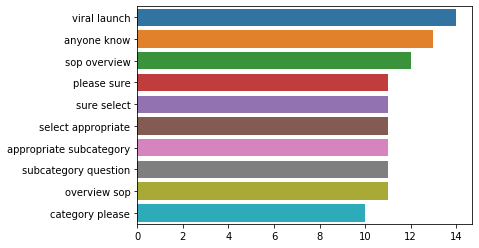

In [138]:
import seaborn as sns

top_n_bigrams=get_top_ngram(train['Leading Comment'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

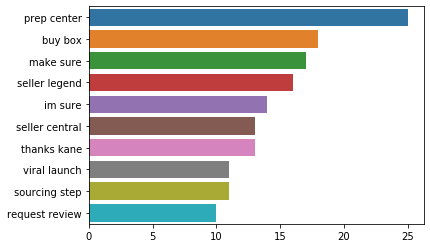

In [139]:
top_n_bigrams=get_top_ngram(train['Other Comments'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

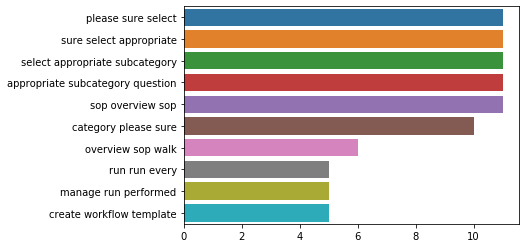

In [140]:
top_tri_grams=get_top_ngram(train['Leading Comment'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

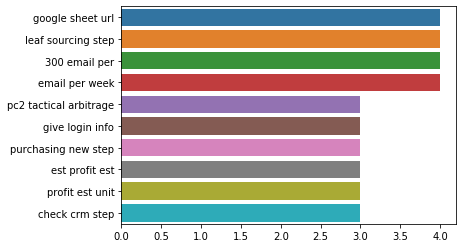

In [142]:
top_tri_grams=get_top_ngram(train['Other Comments'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

### 4.2 Word Cloud Generation

You should consider upgrading via the 'j:\anaconda3\python.exe -m pip install --upgrade pip' command.


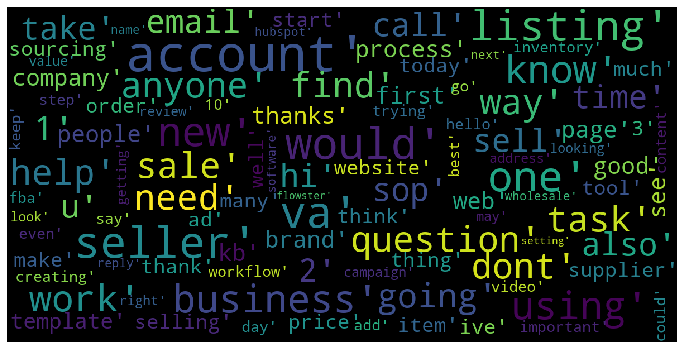

In [144]:
!pip install wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

### 4.3 Category-Wise Word Cloud Generatoon

In [150]:
train_categories=train[['Category', 'Leading Comment']].groupby(by='Category').agg(lambda x: ' '.join(x))

train_categories['BOW'] = ''
columns = ['Leading Comment']

for index, row in train_categories.iterrows():
    words = ''
    for c in columns:
        words += ''.join(row[c]) + ' '
    row['BOW'] = words

train_categories['BOW'] = train_categories['BOW'].str.strip().str.replace('  ', ' ')
train_categories

,Leading Comment,BOW
Category,,
Amazon Specific,question using marketplace category please sur...,question using marketplace category please sur...
Financial Management,question financial management category please ...,question financial management category please ...
Flowster-specific,discussion flowster forum organization improve...,discussion flowster forum organization improve...
Fulfillment,question fulfillment category please sure sele...,question fulfillment category please sure sele...
Human Resources,question human resource category please sure s...,question human resource category please sure s...
Management,question management category please sure selec...,question management category please sure selec...
Misc Topics,question thing dont fall category category ple...,question thing dont fall category category ple...
Product Sourcing,question sourcing category please sure select ...,question sourcing category please sure select ...
Software & Tools,question software tool category please sure se...,question software tool category please sure se...


In [151]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data = cv.fit_transform(train_categories['BOW'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=train_categories.index
df_dtm

,10,100,100kmo,103,1099,10k,10kmo,12,13,145,...,youd,youll,youre,youtube,youve,zap,zaped,zapier,zero,zoom
Category,,,,,,,,,,,,,,,,,,,,,
Amazon Specific,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Financial Management,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Flowster-specific,5,0,0,1,0,0,0,2,2,0,...,2,7,6,1,4,0,1,1,0,0
Fulfillment,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Human Resources,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Management,4,1,0,0,0,0,0,1,2,0,...,3,0,1,2,0,0,0,1,1,0
Misc Topics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Product Sourcing,4,1,1,0,0,1,2,0,0,1,...,0,0,0,0,1,0,0,0,0,2
Software & Tools,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


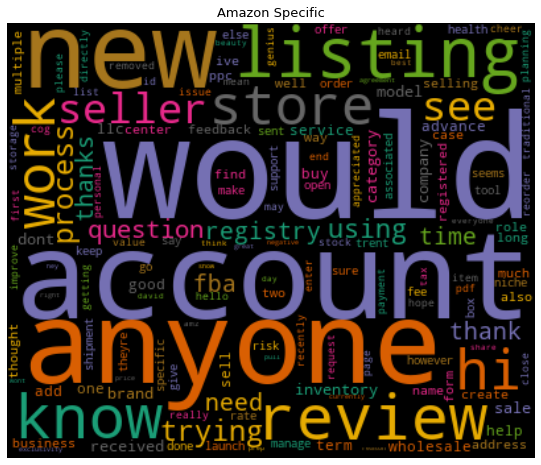

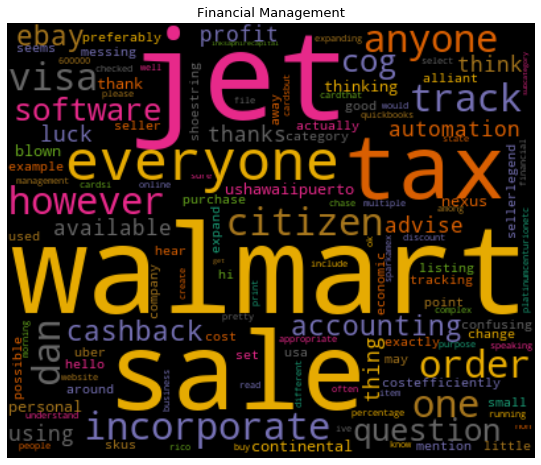

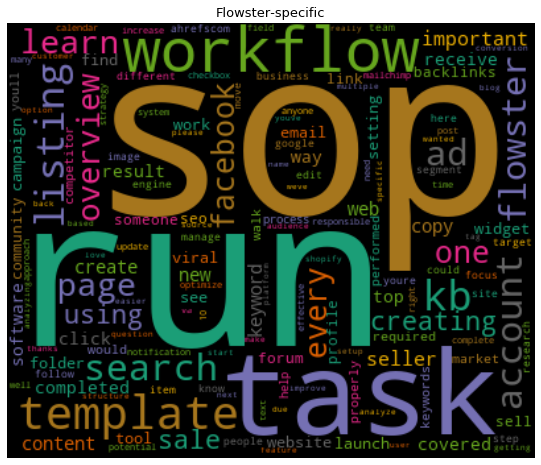

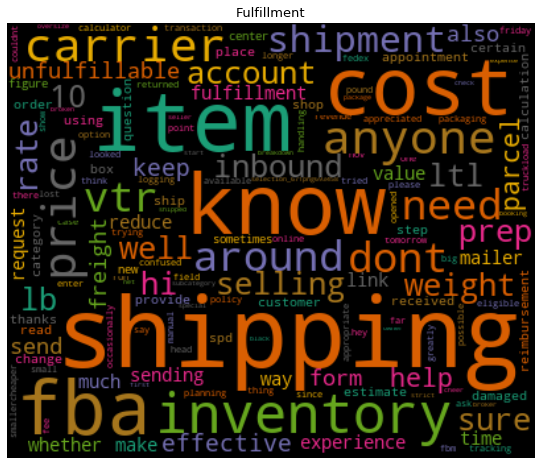

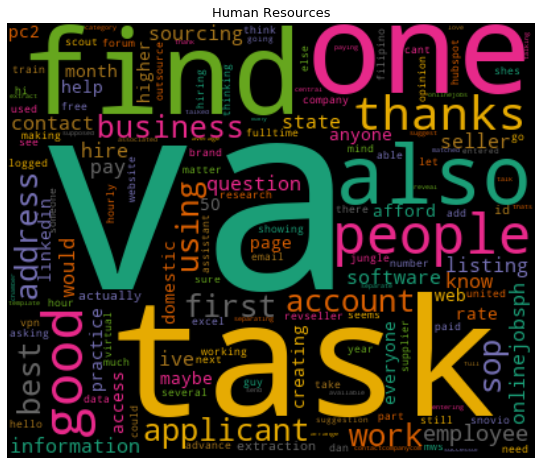

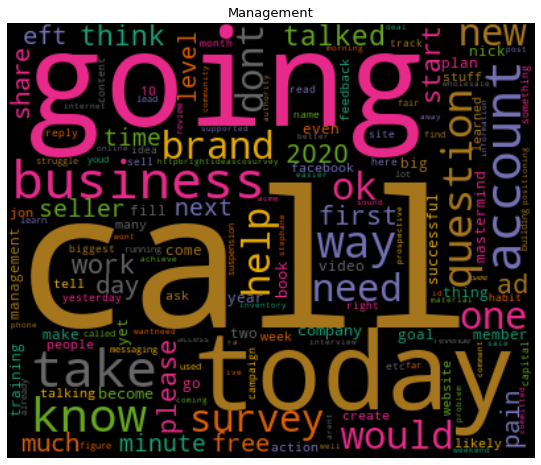

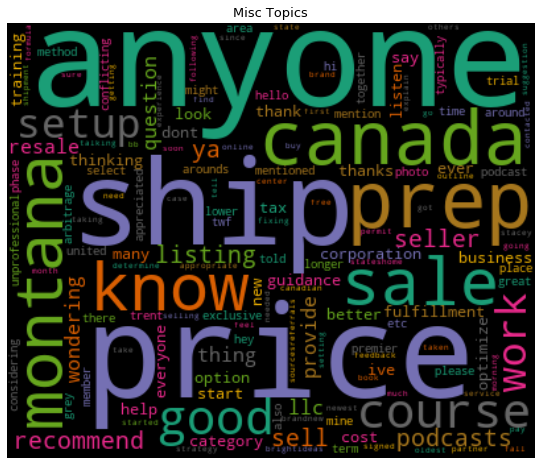

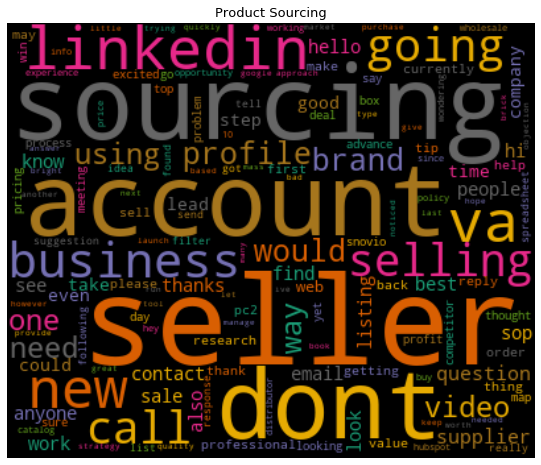

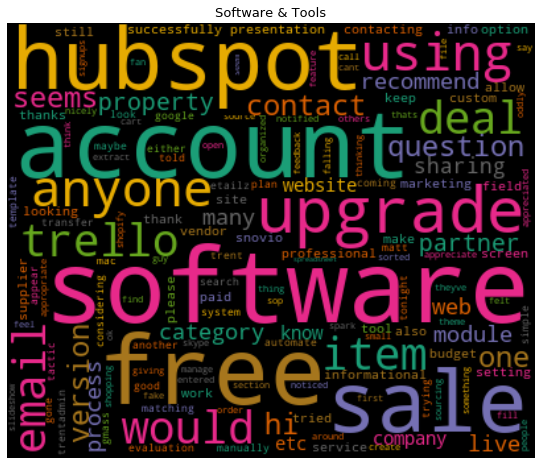

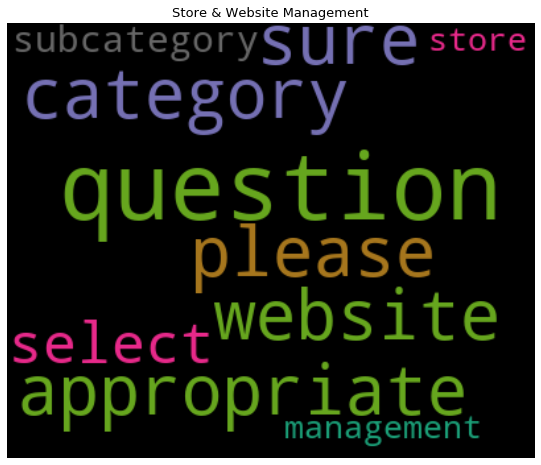

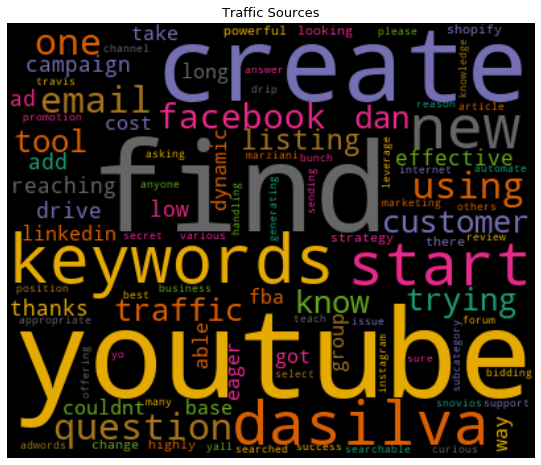

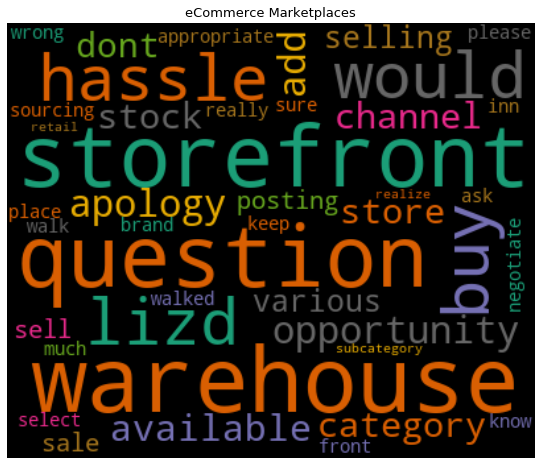

In [152]:
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,categ in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[categ].sort_values(ascending=False),categ)

### 4.4 Plotting the average sentiment of Leading Comments for each Category

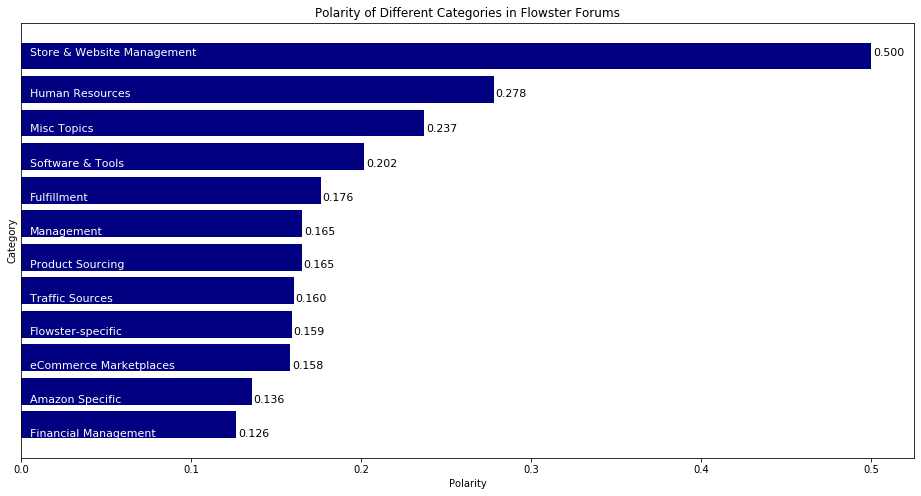

In [158]:
product_polarity_sorted=pd.DataFrame(train.groupby('Category')['sentiment_Leading'].mean().sort_values( ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Category')
plt.title('Polarity of Different Categories in Flowster Forums')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['sentiment_Leading'],color='navy',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['sentiment_Leading']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()